<a href="https://colab.research.google.com/github/zerxe/CEIABDAT/blob/main/SNS/SNS_Actividad_3_2_%E2%80%93_Comparativa_clasificadores_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 3.2 – Comparativa clasificadores NaiveBayes


Adolfo Morales Colmenares

## IMPORTS

In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## Matriz de Confusión

In [2]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adeante

# y_true : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred : ndarray     -> Los valores calcuylados de las clases después de realizar la predicción
# class  : ndarray     -> Los nombres de las clases/valores objetivos

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

## IRIS


In [3]:
iris = sns.load_dataset('iris')
clases_iris = np.array(['setosa', 'versicolor', 'virginica'])

## TRAIN & TEST




In [4]:
# separamos datos de entrada y salida
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
# separamos train y test
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, test_size=0.33, random_state=1)

## VISUAL

CategoricalNB Accuracy: 0.98
Confusion matrix, without normalization
GaussianNB Accuracy: 0.94
Confusion matrix, without normalization
MultinomialNB Accuracy: 0.64
Confusion matrix, without normalization
ComplementNB Accuracy: 0.62
Confusion matrix, without normalization
BernoulliNB Accuracy: 0.28
Confusion matrix, without normalization


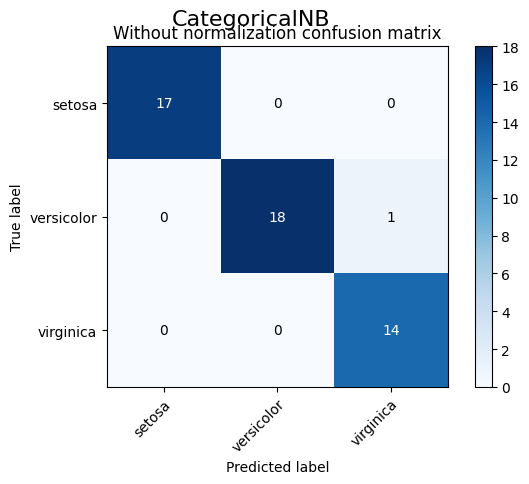

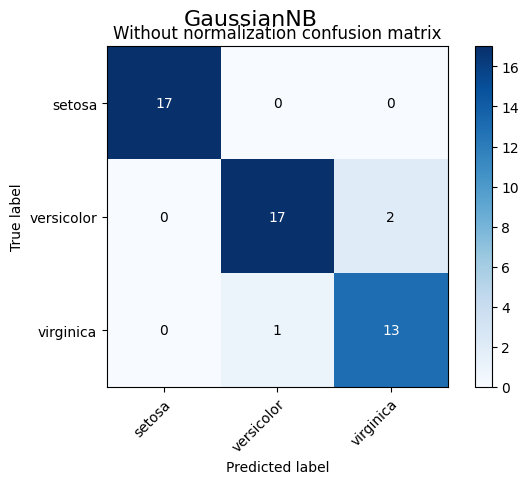

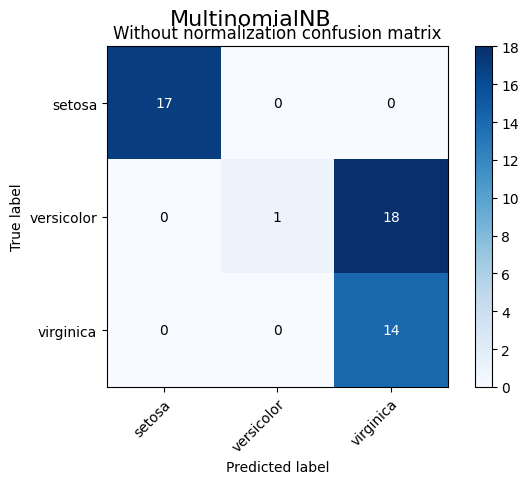

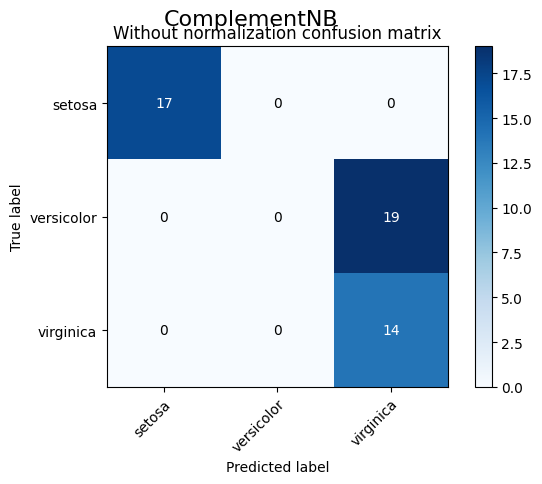

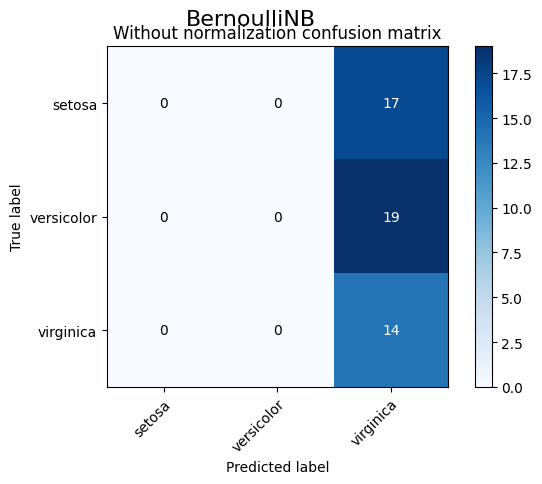

In [5]:
models = [
    ('CategoricalNB', CategoricalNB()),
    ('GaussianNB', GaussianNB()),
    ('MultinomialNB', MultinomialNB()),
    ('ComplementNB', ComplementNB()),
    ('BernoulliNB', BernoulliNB())
]

for name, model in models:
    # Entrenar el modelo
    model.fit(Xtrain, ytrain)

    # Realizar las predicciones
    y_model = model.predict(Xtest)

    # Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
    ytest_df= ytest.to_frame()
    ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)

    # Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
    # Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
    y_model_df= pd.DataFrame(y_model, columns = ['species'])
    y_model_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
    # Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
    y_model_array = y_model_df['species'].to_numpy()

    accuracy = accuracy_score(ytest_df, y_model_df)
    print(f"{name} Accuracy: {accuracy}")

    plot_confusion_matrix(ytest_df['species'], y_model_array, classes=clases_iris, normalize=False, title='Without normalization confusion matrix', titleSup=name)

## PENGUIN


In [6]:
penguins = sns.load_dataset('penguins')
clases_penguins = np.array(['chinstrap', 'adelie', 'Gentoo'])

## TRAIN & TEST

In [7]:
# separamos datos de entrada y salida
X_penguins = penguins.drop('species', axis=1)
y_penguins = penguins['species']

# separamos train y test
Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguins, y_penguins, test_size=0.33, random_state=1)

categorical_cols = X_penguins.select_dtypes(include=['object']).columns
numeric_cols = X_penguins.select_dtypes(exclude=['object']).columns

categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())  # Escalado para modelos que lo necesitan
])

# Preprocesador general
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_preprocessor, numeric_cols),
        ('cat', categorical_preprocessor, categorical_cols)
    ]
)

## VISUAL

CategoricalNB: Accuracy = 0.75
GaussianNB: Accuracy = 0.75
MultinomialNB: Accuracy = 0.88
ComplementNB: Accuracy = 0.75
BernoulliNB: Accuracy = 0.75


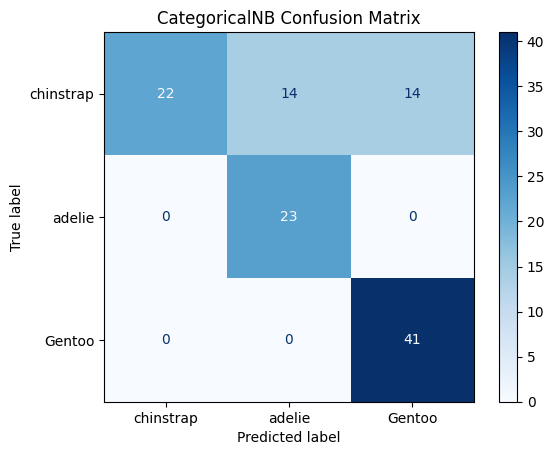

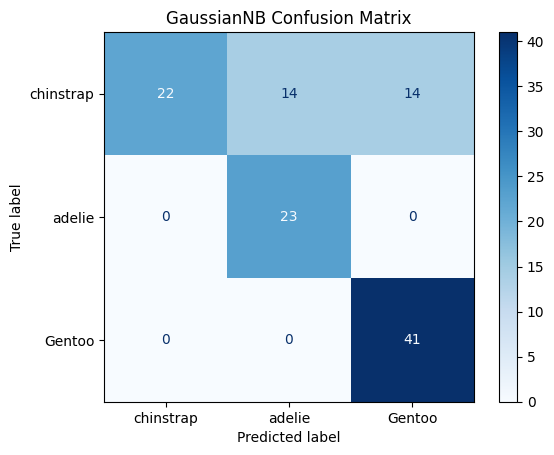

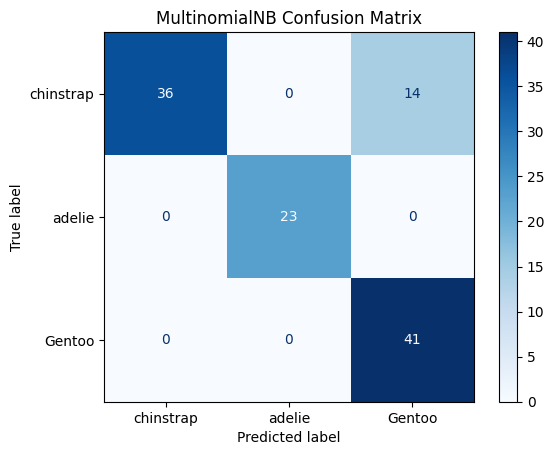

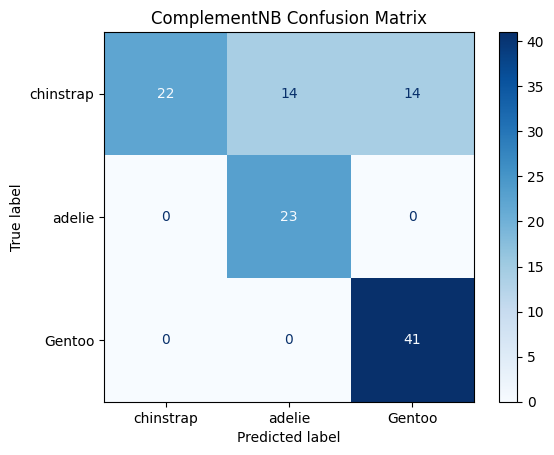

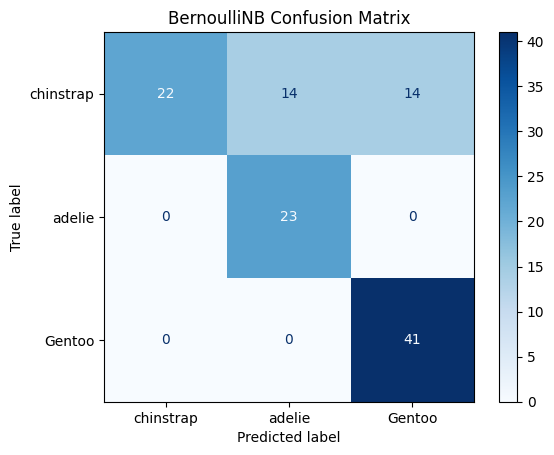

In [8]:
models = [
    ('CategoricalNB', CategoricalNB()),
    ('GaussianNB', GaussianNB()),
    ('MultinomialNB', MultinomialNB()),
    ('ComplementNB', ComplementNB()),
    ('BernoulliNB', BernoulliNB())
]

for name, model in models:

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    # Entrenar el modelo
    pipeline.fit(Xtrain, ytrain)

    # Realizar las predicciones
    y_pred = pipeline.predict(Xtest)

    accuracy = accuracy_score(ytest, y_pred)
    print(f"{name}: Accuracy = {accuracy:.2f}")

    cm = confusion_matrix(ytest, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clases_penguins)
    disp.plot(cmap='Blues')
    disp.ax_.set_title(f"{name} Confusion Matrix")